In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


## Adding Amount in words

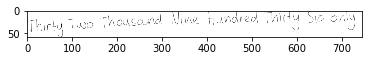

In [2]:
s_img = cv2.imread("in-words-images-transparentBG/0.png", -1)

height, width = s_img.shape[:2]

s_img2 = cv2.resize(s_img, (int(width/1.5), int(height/1.5)), interpolation = cv2.INTER_AREA)

plt.imshow( s_img2)

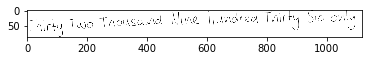

In [3]:
plt.imshow( s_img)

In [4]:
s_img=s_img2

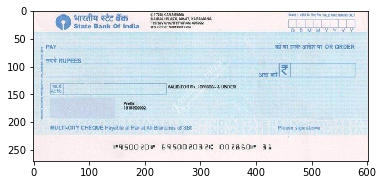

In [5]:
l_img = cv2.imread("cheque.jpg")
l_img = cv2.cvtColor(l_img, cv2.COLOR_BGR2RGB)
plt.imshow( l_img)

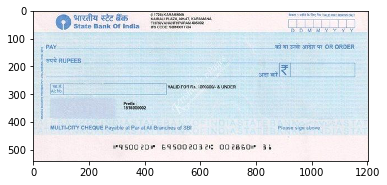

In [6]:

height2, width2 = l_img.shape[:2]
dst = cv2.resize(l_img, (2*width2, 2*height2), interpolation = cv2.INTER_CUBIC)
plt.imshow( dst)

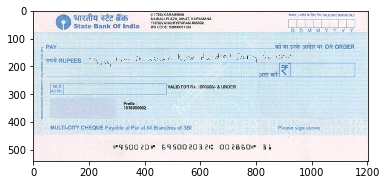

In [7]:



x_offset= 200 
y_offset=150
#l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

#s_img = cv2.imread("smaller_image.png")

y1, y2 = y_offset, y_offset + s_img.shape[0]
x1, x2 = x_offset, x_offset + s_img.shape[1]

alpha_s = s_img[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s
dst2=dst
for c in range(0, 3):
    dst2[y1:y2, x1:x2, c] = (alpha_s * s_img[:, :, c] +
                              alpha_l * dst2[y1:y2, x1:x2, c])
    
plt.imshow( dst2)

## Adding number in box


(28, 141)


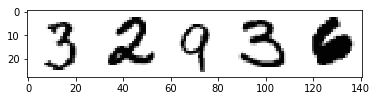

In [8]:
num_img = cv2.imread("Combined_transparent/number_0.png", cv2.IMREAD_GRAYSCALE)

height, width = num_img.shape[:2]
#num_img = cv2.resize(num_img, (int(width/2), int(height/2)), interpolation = cv2.INTER_AREA)
print(num_img.shape)
#num_img_show = cv2.cvtColor(num_img,cv2.IMREAD_GRAYSCALE)
plt.imshow( num_img ,cmap='gray')


True

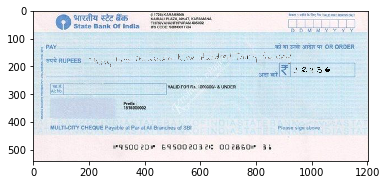

In [9]:
x_offset= 930 
y_offset=200
#l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

#s_img = cv2.imread("smaller_image.png")

y1, y2 = y_offset, y_offset + num_img.shape[0]
x1, x2 = x_offset, x_offset + num_img.shape[1]

alpha_s = num_img[:, :] / 255.0
alpha_l = 1.0 - alpha_s
dst3=dst2
for c in range(0, 3):
    dst3[y1:y2, x1:x2, c] = (alpha_l * num_img[:, :] +
                              alpha_s * dst3[y1:y2, x1:x2, c])
    



plt.imshow( dst3)
dst4 = cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB)
cv2.imwrite("final-image.jpg", dst4)


In [156]:
#dst2 = cv2.cvtColor(dst2, cv2.COLOR_RGB2BGR)

In [157]:
cv2.imwrite("final-image.jpg", dst3)

True

# adding date

In [101]:
from PIL import Image
import os

folder_path_input = "dates/"
folder_path_output= "dates-transparentBG/"

"""

image_names =os.listdir(folder_path_input)

for img_name in image_names:
    print (img_name)
    img = Image.open(folder_path_input+img_name)
    img = img.convert("LA")
    datas = img.getdata()

    newData = []
    for item in datas:
        if item[0] == 255 :
            newData.append((255,  0))
        else:
            newData.append(item)
    #os.chdir(folder_path_output)
    img.putdata(newData)
    img.save(folder_path_output+img_name, "PNG")
"""

'\n\nimage_names =os.listdir(folder_path_input)\n\nfor img_name in image_names:\n    print (img_name)\n    img = Image.open(folder_path_input+img_name)\n    img = img.convert("LA")\n    datas = img.getdata()\n\n    newData = []\n    for item in datas:\n        if item[0] == 255 :\n            newData.append((255,  0))\n        else:\n            newData.append(item)\n    #os.chdir(folder_path_output)\n    img.putdata(newData)\n    img.save(folder_path_output+img_name, "PNG")\n'

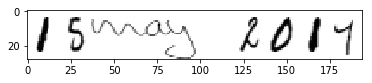

In [10]:
date_img = cv2.imread("dates-transparentBG/date_0.png",  cv2.IMREAD_GRAYSCALE)

height, width = date_img.shape[:2]
date_img = cv2.resize(date_img, (int(width/1.5), int(height/1)), interpolation = cv2.INTER_AREA)
plt.imshow( date_img ,cmap='gray')


True

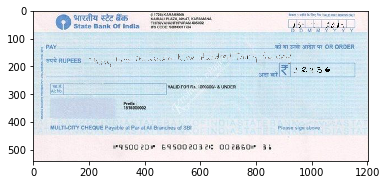

In [11]:
x_offset= 930 
y_offset=40
#l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

#s_img = cv2.imread("smaller_image.png")

y1, y2 = y_offset, y_offset + date_img.shape[0]
x1, x2 = x_offset, x_offset + date_img.shape[1]

alpha_s = date_img[:, :] / 255.0
alpha_l = 1.0 - alpha_s
dst4=dst3
for c in range(0, 3):
    dst4[y1:y2, x1:x2, c] = (alpha_l * date_img[:, :] +
                              alpha_s * dst3[y1:y2, x1:x2, c])
    



plt.imshow( dst4)
dst5 = cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB)
cv2.imwrite("final-image.jpg", dst5)

In [12]:
 import csv

In [19]:
with open('details3.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    header = True
    for row in spamreader:
        if(header):
            header = False
            continue
        print( row)
        break

['0', '0', 'b_car_003001.png', '32936', 'Thirty Two Thousand Nine Hundred Thirty Six only', '0', 'number_0.png', '1552017', 'date_0.png']


In [21]:
with open('final-data.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    with open('details3.csv', 'r') as csvfile2:
        spamreader = csv.reader(csvfile2, delimiter=',')
        header = True
        for row in spamreader:
            if(header):
                header = False
                continue
            else:
                #print( row)
                try:
                    l_img = cv2.imread("cheque.jpg")
                    l_img = cv2.cvtColor(l_img, cv2.COLOR_BGR2RGB)
                    height2, width2 = l_img.shape[:2]
                    dst = cv2.resize(l_img, (2*width2, 2*height2), interpolation = cv2.INTER_CUBIC)
                    
                    s_img = cv2.imread("in-words-images-transparentBG/" +row[0]+".png", -1)

                    height, width = s_img.shape[:2]

                    s_img2 = cv2.resize(s_img, (int(width/1.5), int(height/1.5)), interpolation = cv2.INTER_AREA)

                    x_offset= 200 
                    y_offset=150
                    #l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

                    #s_img = cv2.imread("smaller_image.png")

                    y1, y2 = y_offset, y_offset + s_img2.shape[0]
                    x1, x2 = x_offset, x_offset + s_img2.shape[1]

                    alpha_s = s_img2[:, :, 3] / 255.0
                    alpha_l = 1.0 - alpha_s
                    dst2=dst
                    for c in range(0, 3):
                        dst2[y1:y2, x1:x2, c] = (alpha_s * s_img2[:, :, c] +
                                                  alpha_l * dst2[y1:y2, x1:x2, c])

                    row=row+["box1",x1,y1,x2,y2]
                    #print(x1,y1,x2,y2)

                    ####################################
                    num_img = cv2.imread("Combined_transparent/" +row[6], cv2.IMREAD_GRAYSCALE)

                    height, width = num_img.shape[:2]
                    x_offset= 930 
                    y_offset=200
                    #l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

                    #s_img = cv2.imread("smaller_image.png")

                    y1, y2 = y_offset, y_offset + num_img.shape[0]
                    x1, x2 = x_offset, x_offset + num_img.shape[1]

                    alpha_s = num_img[:, :] / 255.0
                    alpha_l = 1.0 - alpha_s
                    dst3=dst2
                    for c in range(0, 3):
                        dst3[y1:y2, x1:x2, c] = (alpha_l * num_img[:, :] +
                                                  alpha_s * dst3[y1:y2, x1:x2, c])

                    row=row+["box2",x1,y1,x2,y2]
                    #print(x1,y1,x2,y2)
                    ####################################
                    date_img = cv2.imread("dates-transparentBG/" +row[8],  cv2.IMREAD_GRAYSCALE)

                    height, width = date_img.shape[:2]
                    date_img = cv2.resize(date_img, (int(width/1.5), int(height/1)), interpolation = cv2.INTER_AREA)
                    x_offset= 930 
                    y_offset=40
                    #l_img[y_offset:y_offset+s_img.shape[0], x_offset:x_offset+s_img.shape[1]] = s_img

                    #s_img = cv2.imread("smaller_image.png")

                    y1, y2 = y_offset, y_offset + date_img.shape[0]
                    x1, x2 = x_offset, x_offset + date_img.shape[1]

                    alpha_s = date_img[:, :] / 255.0
                    alpha_l = 1.0 - alpha_s
                    dst4=dst3
                    for c in range(0, 3):
                        dst4[y1:y2, x1:x2, c] = (alpha_l * date_img[:, :] +
                                                  alpha_s * dst4[y1:y2, x1:x2, c])

                    row=row+["box3",x1,y1,x2,y2]
                    #print(x1,y1,x2,y2)
                    #plt.imshow( dst4)
                    dst5 = cv2.cvtColor(dst4, cv2.COLOR_BGR2RGB)
                    cv2.imwrite("final-data/final-image-"+row[0]+".jpg", dst5)
                    row=row+["final-data/final-image-"+row[0]+".jpg"]
                    writer.writerow(row)
                    #break
                except :
                        print("issue occured")
                        pass
                #break

# building train config file for yolo

In [30]:
from PIL import Image
with open('final-data.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    header = True
    
    im=Image.open("final-data/final-image-0.jpg")
    w= int(im.size[0])
    h= int(im.size[1])
    dw = 1./w
    dh = 1./h
    for row in spamreader:
        """
        if(header):
            header = False
            print( row)
            continue
        else:
            print( row)
            break
        """
        
        #print( row)
        #print( row[9])
        #print( row[14])
        #print( row[19])
        with open('final-data/final-image-'+row[0]+'.txt', 'w') as csvfile2:
           
            x = (int(row[10]) + int(row[12]))/2.0
            y = (int(row[11]) + int(row[13]))/2.0
            w = int(row[12] )- int(row[10])
            h = int(row[13]) - int(row[11])
            x = x*dw
            w = w*dw
            y = y*dh
            h = h*dh
            #print(x,y,w,h)
            writer = csv.writer(csvfile2, delimiter=',')
            writeRow=[0]+[x,y,w,h]
            writer.writerow(writeRow)
            
            x = (int(row[10+5]) + int(row[12+5]))/2.0
            y = (int(row[11+5]) + int(row[13+5]))/2.0
            w = int(row[12+5] )- int(row[10+5])
            h = int(row[13+5]) - int(row[11+5])
            x = x*dw
            w = w*dw
            y = y*dh
            h = h*dh
            #print(x,y,w,h)
            writer = csv.writer(csvfile2, delimiter=',')
            writeRow=[1]+[x,y,w,h]
            writer.writerow(writeRow)
            
            x = (int(row[10+5+5]) + int(row[12+5+5]))/2.0
            y = (int(row[11+5+5]) + int(row[13+5+5]))/2.0
            w = int(row[12+5+5] )- int(row[10+5+5])
            h = int(row[13+5+5]) - int(row[11+5+5])
            x = x*dw
            w = w*dw
            y = y*dh
            h = h*dh
            #print(x,y,w,h)
            writer = csv.writer(csvfile2, delimiter=',')
            writeRow=[2]+[x,y,w,h]
            writer.writerow(writeRow)


['0', '0', 'b_car_003001.png', '32936', 'Thirty Two Thousand Nine Hundred Thirty Six only', '0', 'number_0.png', '1552017', 'date_0.png', 'box1', '200', '150', '944', '208', 'box2', '930', '200', '1071', '228', 'box3', '930', '40', '1124', '68', 'final-data/final-image-0.jpg']
box1
box2
box3
0.4750830564784053 0.3314814814814815 0.6179401993355482 0.10740740740740741
0.8309800664451827 0.3962962962962963 0.11710963455149502 0.05185185185185186
0.8529900332225914 0.1 0.1611295681063123 0.05185185185185186


## building test and train data for YOLO

In [18]:
import glob, os

# Current directory
current_dir = os.path.dirname(os.path.abspath('final-data/final-image-0.jpg'))
print(current_dir)
# Directory where the data will reside, relative to 'darknet.exe'
path_data = 'final-data/'

# Percentage of images to be used for the test set
percentage_test = 10;

# Create and/or truncate train.txt and test.txt
file_train = open('train.txt', 'w')  
file_test = open('test.txt', 'w')

# Populate train.txt and test.txt
counter = 1  
index_test = round(100 / percentage_test)  
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):  
    title, ext = os.path.splitext(os.path.basename(pathAndFilename))

    if counter == index_test:
        counter = 1
        file_test.write(path_data + title + '.jpg' + "\n")
    else:
        file_train.write(path_data + title + '.jpg' + "\n")
        counter = counter + 1

/home/ashutosh/sentienceWork/magnet/final-data
